# 14. Data visualizations

## Setup

In [5]:
incidents_selected_file <- '../preprocessed_data/incidents_selected_2019-09-10.feather'

In [6]:
library(tidyverse)
library(lubridate)
library(ggmap)

In [7]:
key <- readChar('../maps_key.txt', file.info('../maps_key.txt')$size)
register_google(key=key)

In [9]:
incidents <- feather::read_feather(incidents_selected_file)
incidents$YEAR <- year(incidents$LOCAL_DATETIME)
glimpse(incidents)

Observations: 6,842
Variables: 10
$ OPERATOR_ID        <chr> "22610", "31672", "32035", "1845", "300", "31684",…
$ LOCAL_DATETIME     <dttm> 2010-02-16 02:42:00, 2010-03-01 06:50:00, 2010-02…
$ NAME               <chr> "MAGELLAN PIPELINE COMPANY, LP", "CHAPARRAL ENERGY…
$ COMMODITY          <chr> "REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH …
$ SERIOUS            <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ SIGNIFICANT        <lgl> FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, TRUE, TRU…
$ LOCATION_LATITUDE  <chr> "41.94352", "37.10847", "32.22471", "40.6086", "31…
$ LOCATION_LONGITUDE <chr> "-88.23353", "-100.80037", "-101.4044", "-74.2399"…
$ ONSHORE            <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ YEAR               <dbl> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 20…


## 14.1 Visualize incident locations (US)

In [37]:
map <- get_map("lebanon, kansas", zoom = 5, source = "stamen", maptype = "toner-lite", crop = FALSE)

Source : https://maps.googleapis.com/maps/api/staticmap?center=lebanon,%20kansas&zoom=5&size=640x640&scale=2&maptype=terrain&key=xxx-hoo6w1-zxo
Source : https://maps.googleapis.com/maps/api/geocode/json?address=lebanon,+kansas&key=xxx-hoo6w1-zxo
Source : http://tile.stamen.com/toner-lite/5/5/10.png
Source : http://tile.stamen.com/toner-lite/5/6/10.png
Source : http://tile.stamen.com/toner-lite/5/7/10.png
Source : http://tile.stamen.com/toner-lite/5/8/10.png
Source : http://tile.stamen.com/toner-lite/5/5/11.png
Source : http://tile.stamen.com/toner-lite/5/5/12.png
Source : http://tile.stamen.com/toner-lite/5/5/13.png


In [72]:
significant_incidents <- subset(incidents, SIGNIFICANT == TRUE & YEAR >= 2010)
significant_incidents$LOCATION_LATITUDE <- as.numeric(significant_incidents$LOCATION_LATITUDE)
significant_incidents$LOCATION_LONGITUDE <- as.numeric(significant_incidents$LOCATION_LONGITUDE)
significant_incidents <-subset(significant_incidents, YEAR < 2019)

Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Removed 82 rows containing missing values (geom_point).”

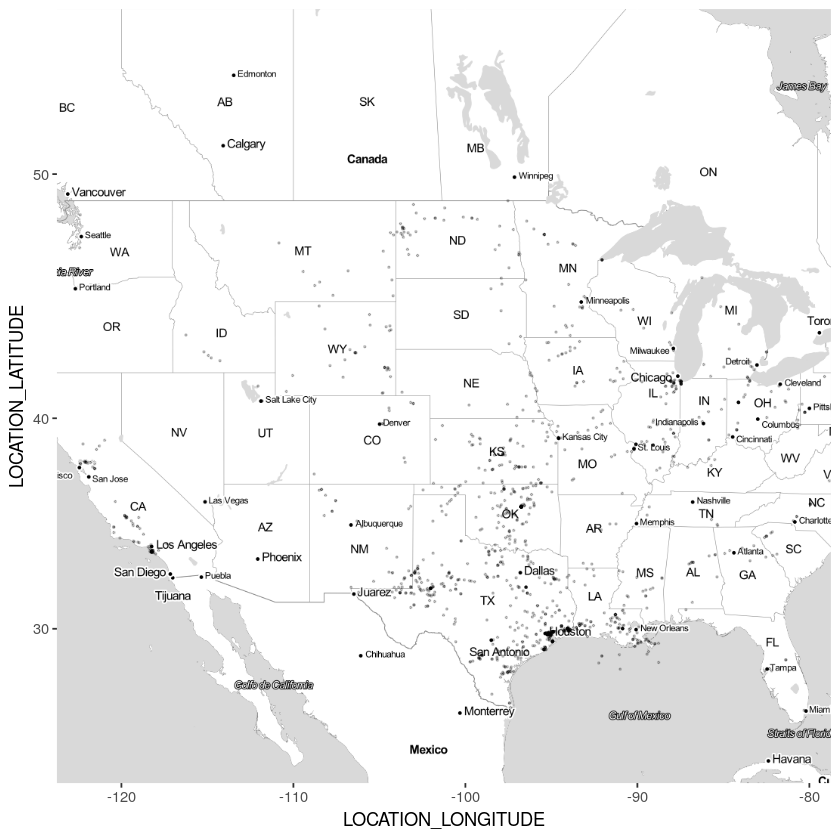

In [74]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.3, alpha = 0.2, scatter=1, color = "black")

Warning message:
“Removed 82 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 82 rows containing missing values (geom_point).”

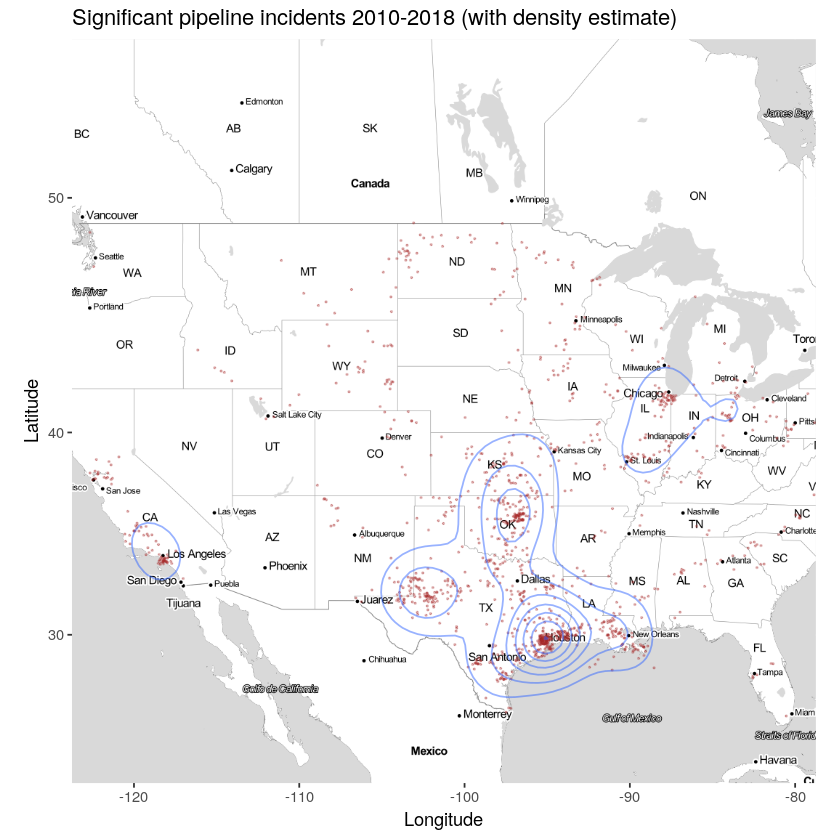

In [91]:
plot1 <- ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_jitter(size = 0.25, alpha = 0.3, color = "brown", width=0.3, height=0.2) +
    geom_density2d(alpha = 0.5) + 
    labs(title="Significant pipeline incidents 2010-2018 (with density estimate)", x="Longitude", y="Latitude")
print(plot1)

In [92]:
ggsave("../drafts/summer_paper/illustrations/incidents.png", plot1)

Saving 6.67 x 6.67 in image
Warning message:
“Removed 82 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 82 rows containing missing values (geom_point).”

Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Ignoring unknown parameters: rows, ncol”Warning message:
“Removed 85 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 85 rows containing missing values (geom_point).”

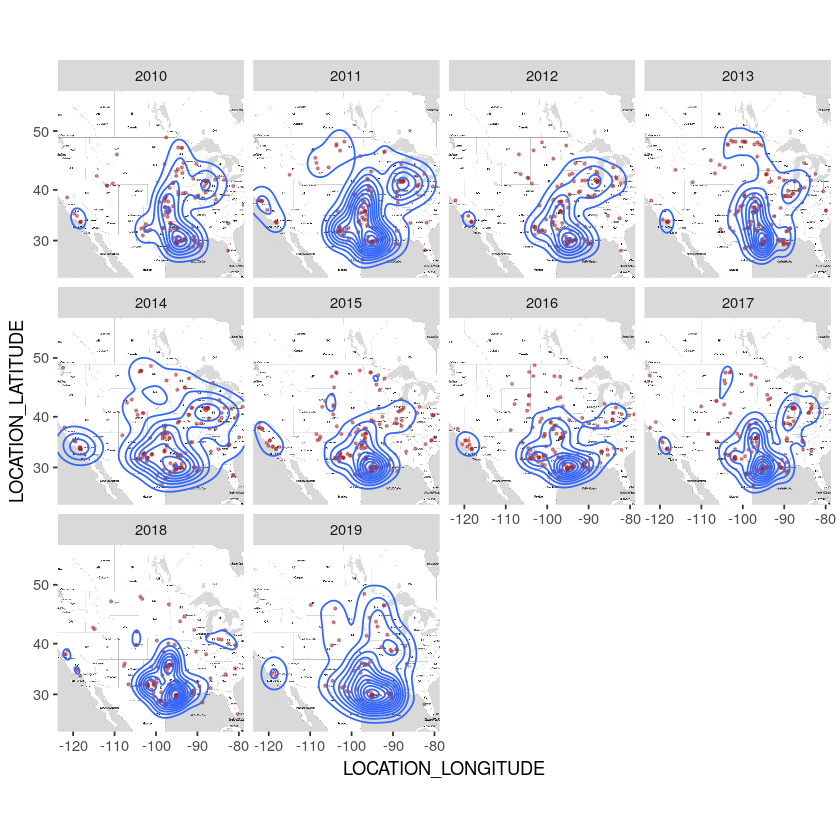

In [61]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.5, alpha = 0.5, scatter=0.5, color = "brown") +
    geom_density_2d(rows = 3, ncol = 4) +
    facet_wrap(~YEAR, nrow=3)

## Visualize incident locations (Gulf of Mexico)

In [62]:
gulf_map <- get_map("gulf of mexico", zoom = 6, source = "stamen", maptype = "toner-lite", crop = FALSE)

Source : https://maps.googleapis.com/maps/api/staticmap?center=gulf%20of%20mexico&zoom=6&size=640x640&scale=2&maptype=terrain&key=xxx-hoo6w1-zxo
Source : https://maps.googleapis.com/maps/api/geocode/json?address=gulf+of+mexico&key=xxx-hoo6w1-zxo
Source : http://tile.stamen.com/toner-lite/6/14/26.png
Source : http://tile.stamen.com/toner-lite/6/15/26.png
Source : http://tile.stamen.com/toner-lite/6/16/26.png
Source : http://tile.stamen.com/toner-lite/6/17/26.png
Source : http://tile.stamen.com/toner-lite/6/14/27.png
Source : http://tile.stamen.com/toner-lite/6/15/27.png
Source : http://tile.stamen.com/toner-lite/6/16/27.png
Source : http://tile.stamen.com/toner-lite/6/17/27.png
Source : http://tile.stamen.com/toner-lite/6/14/28.png
Source : http://tile.stamen.com/toner-lite/6/15/28.png
Source : http://tile.stamen.com/toner-lite/6/16/28.png
Source : http://tile.stamen.com/toner-lite/6/17/28.png


Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Removed 1007 rows containing missing values (geom_point).”

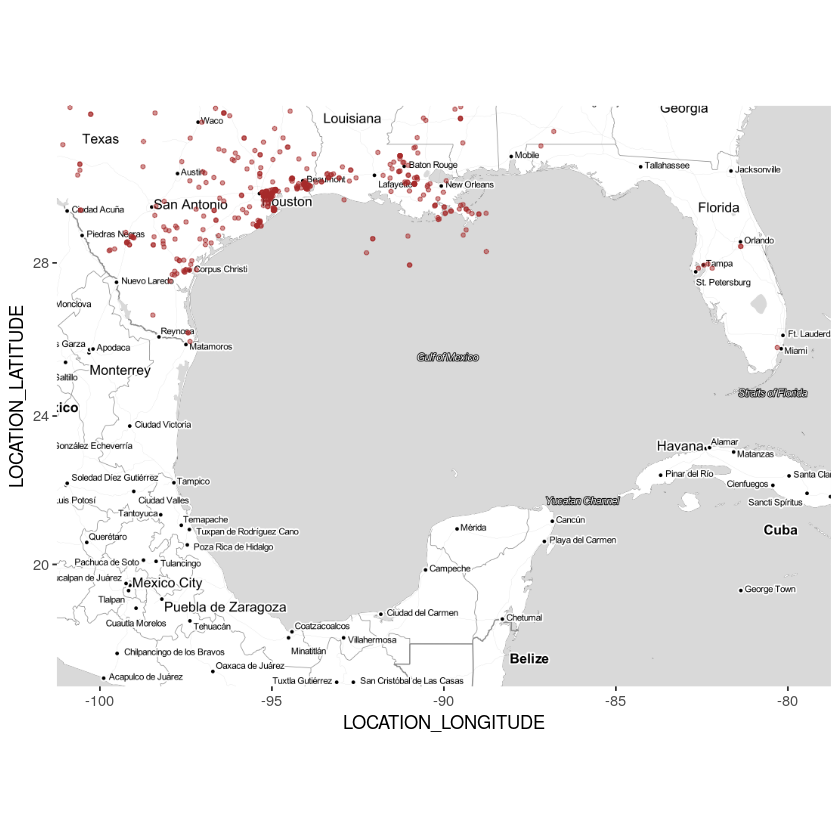

In [63]:
ggmap(gulf_map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.9, alpha = 0.5, scatter=0.6, color = "brown")

## Visualize locations by type

Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Ignoring unknown parameters: rows, ncol”Warning message:
“Removed 85 rows containing non-finite values (stat_density2d).”Warning message:
“Computation failed in `stat_density2d()`:
missing value where TRUE/FALSE needed”Warning message:
“Removed 85 rows containing missing values (geom_point).”

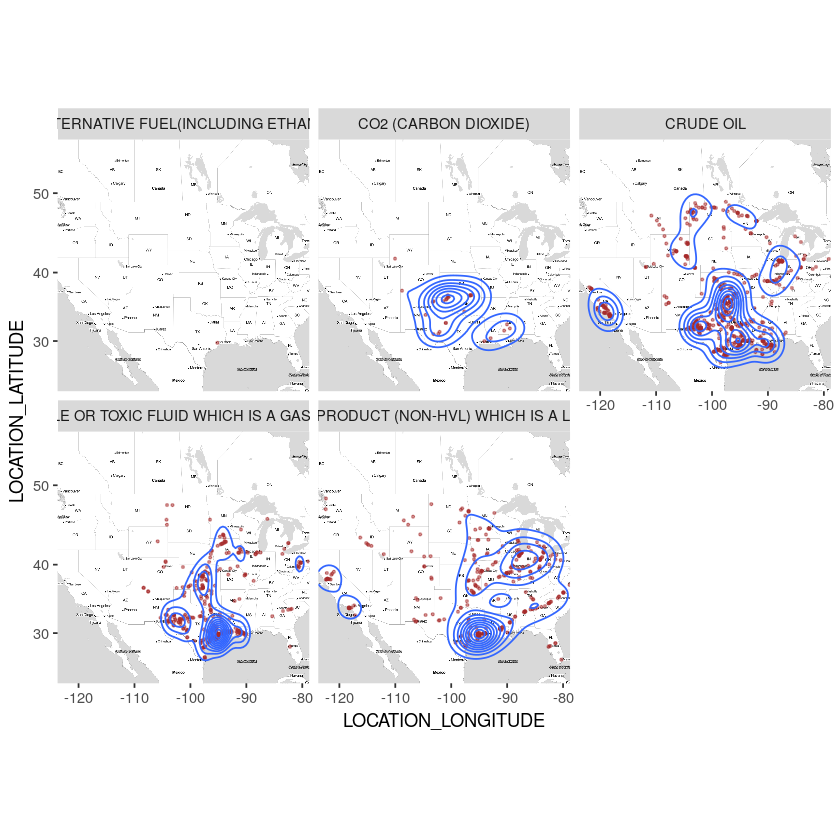

In [64]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.5, alpha = 0.5, scatter=0.5, color = "brown") +
    geom_density_2d(rows = 3, ncol = 4) +
    facet_wrap(~COMMODITY)

In [65]:
table(incidents$COMMODITY)


                                         BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS) 
                                                                                            4 
                                                                         CO2 (CARBON DIOXIDE) 
                                                                                           54 
          CO2/N2 OR OTHER NON-FLAMMABLE, NON-TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS 
                                                                                           38 
                                                                                    CRUDE OIL 
                                                                                         3299 
GASOLINE, DIESEL, FUEL OIL OR OTHER PETROLEUM PRODUCT WHICH IS A LIQUID AT AMBIENT CONDITIONS 
                                                                                         1181 
                   HVL OR OTHER FLAMMABLE OR TOXI

## Summary

It seems the number of incidents that occur (or are reported) on offshore pipelines is negligable. We can probably accomplish more accurate modeling results if we exclude offshore pipelines.

## 14.2 Incidents per year trend

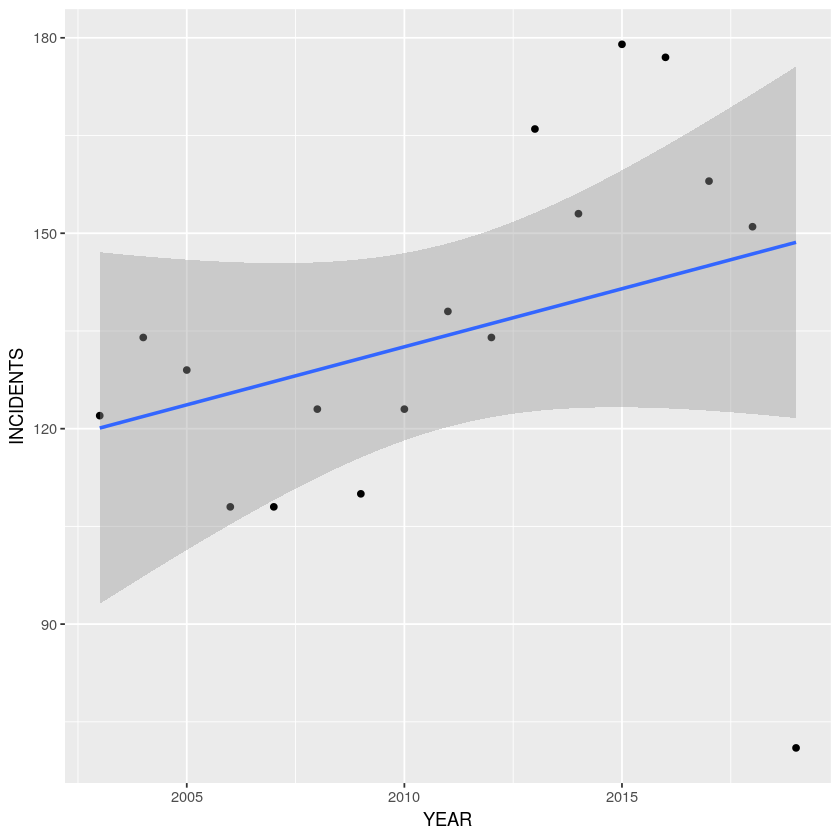

In [67]:
incidents %>%
    filter(SIGNIFICANT == TRUE) %>%
    filter(YEAR > 2002) %>%
    group_by(YEAR) %>%
    summarize(INCIDENTS = n()) %>%
    ggplot(aes(x=YEAR, y=INCIDENTS)) +
        geom_point() +
        geom_smooth(method="lm")

In [71]:
table(subset(incidents, SIGNIFICANT==TRUE, YEAR))


2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 
   1  126  122  134  129  108  108  123  110  123  138  134  166  153  179  177 
2017 2018 2019 
 158  151   71 